In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
loss_10_name = "/home/tim/data/training_logs/pairs_10/train_val_16_11.log"
loss_17_name = "/home/tim/data/training_logs/pairs_17/pairs_17_train_loss.log"
loss_1617_name = "/home/tim/data/training_logs/pairs_16_17/pairs_16_17_train_loss.log"

In [5]:
with open (loss_10_name, "r") as f:
    loss_10 = f.readlines()
with open (loss_17_name, "r") as f:
    loss_17 = f.readlines()
with open (loss_1617_name, "r") as f:
    loss_1617 = f.readlines()

In [6]:
def get_losses(test_loss):
    train_loss_array = []
    val_loss_array = []
    for i in range(len(test_loss)):
        parts = test_loss[i].split()
        if parts[0] == "Epoch:":
            train_loss_array.append(float(parts[7].strip("()")))
        elif parts[0] == "Average":
            val_loss_array.append(float(parts[10]))
    return train_loss_array, val_loss_array

In [32]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [62]:
train_loss_10, val_loss_10 = get_losses(loss_10)
train_loss_10= moving_average(np.asarray(train_loss_10),100)
val_loss_10 =np.asarray(val_loss_10)
x_train_10 = np.linspace(0,17,len(train_loss_10))
x_val = np.arange(1,len(val_loss_10)+1)
print(x_val)

[]


In [63]:
train_loss_17, val_loss_17 = get_losses(loss_17)
train_loss_17= moving_average(np.asarray(train_loss_17),200)
val_loss_17 =np.asarray(val_loss_17)
x_train_17 = np.linspace(0,99,len(train_loss_17))
x_val = np.arange(1,len(val_loss_17)+1)
print(x_val)

[]


In [71]:
train_loss_1617, val_loss_1617 = get_losses(loss_1617)
train_loss_1617= moving_average(np.asarray(train_loss_1617),400)
val_loss_1617 =np.asarray(val_loss_1617)
x_train_1617 = np.linspace(0,49,len(train_loss_1617))
x_val_1617 = np.arange(1,len(val_loss_1617)+1)
print(x_val_1617)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]


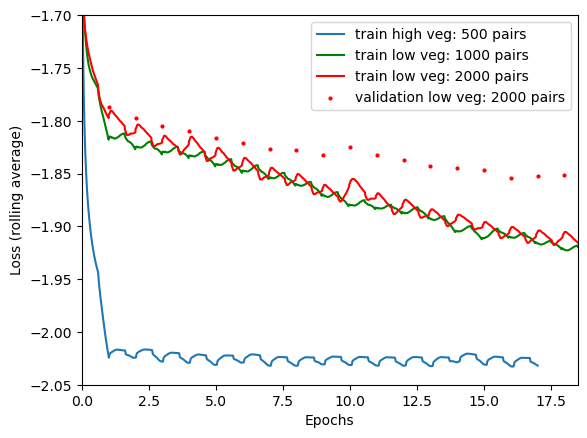

In [78]:
plt.plot(x_train_10, train_loss_10, label="train high veg: 500 pairs")
plt.plot(x_train_17, train_loss_17-0.1, label="train low veg: 1000 pairs", color='g')
plt.plot(x_train_1617, train_loss_1617-0.1, label="train low veg: 2000 pairs",color='r')
plt.scatter(x_val_1617, val_loss_1617-0.1, label="validation low veg: 2000 pairs",color="r",s=4)
plt.ylabel('Loss (rolling average)')
plt.xlabel('Epochs')
plt.ylim(-2.05,-1.7)
plt.xlim(0,18.5)
plt.legend()

In [ ]:
fig,ax = plt.subplots()
l1 = ax.plot(x_train, train_loss_array,label="train loss")
l2 = ax.scatter(x_test, test_loss_array[:,0],color='r',label="test loss")
ax2 = ax.twinx()
l3 = ax2.scatter(x_test, test_loss_array[:,1],color='orange', marker='x')
ax.set_xlim(0,68)
ax.set_ylim(-2.05,-1.5)
ax2.set_ylim(2,6)
ax.set_ylabel("log loss")
ax2.set_ylabel("MAE (test)")
ax.set_xlabel("epochs")
ax.scatter([], [], color='orange', marker='x',label = 'test MAE')
ax.legend()
plt.title("Train size = 50")